# Matrix Applications: SVD & PCA 
**FIZ353 - Numerical Analysis | 20/11/2020**

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

# The spring "problem" -- "With Noise" Edition
Consider an ideal spring attached to a body, on a <strike>frictionless</strike> surface. What else can we ask! Here is how it will look like:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(353)

In [2]:
k = 10 # N/m Spring constant
m = 1 # kg # Mass

A = 5 # cm - Amplitude
w = np.sqrt(k/m) # Frequency

N = 50 # Number of observations

t = np.linspace(0,20,N)
x = A*np.cos(w*t)+A*(np.random.rand(N)*2-1)*0.5

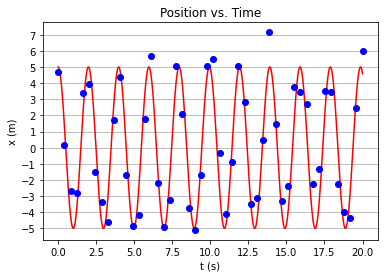

In [3]:
tt = np.linspace(0,20,1000)
xx = A*np.cos(w*tt)
plt.plot(tt,xx,"r-")

plt.plot(t,x,"ob")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.yticks(np.arange(-5,8))
plt.title("Position vs. Time")
plt.grid(axis='y')

plt.show()

So, the harmonic motion is obvious. But keep in mind that this is the position vs. time graph. If we were to record the motion of the body using a camera placed on top, we would observe something like:

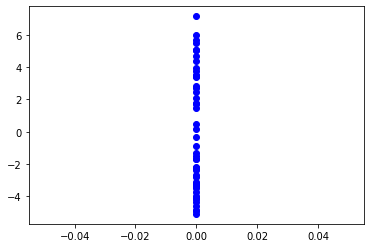

In [4]:
plt.plot(np.zeros((N,1)),x,"ob")
plt.show()

Which, obviously, is just the projection of the "x vs. t" graph unto the x axis (do please verify that this is indeed the case).

In [5]:
## A print script to feed into CalcPlot3d -- Nevermind 8)
## (https://www.monroecc.edu/faculty/paulseeburger/calcnsf/CalcPlot3D/)
#for i in x:
#    print("    <point>\n        point=\"(%.4f,0,0)\"\n        color=\"rgb(0,0,255)\"\n        size=\"4\" \n        visible=\"true\"\n    </point>\n"%(i))

Go on and just play with the interactable plot below (obtained using [CalcPlot3D](https://www.monroecc.edu/faculty/paulseeburger/calcnsf/CalcPlot3D/)'s wonderful scripting options)

In [6]:
from IPython.display import HTML
HTML('<iframe frameborder="0" height="480px" src="https://c3d.libretexts.org/CalcPlot3D/dynamicFigure/'\
     +'index.html?type=point;point=(5.0000,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.3821,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.2359,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.7239,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.1771,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9275,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.5470,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.6251,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.1040,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.9091,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.7123,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-0.3039,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.8803,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.3942,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.5567,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.3605,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.1460,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.9940,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.6149,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.1012,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.8823,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.9549,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.9631,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-0.7889,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.5269,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.2916,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.7072,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.7882,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.0600,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.8214,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.6055,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.3810,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.4747,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.9072,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9762,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.8439,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.9568,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.0314,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.7280,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9868,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.0289,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.4179,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.4713,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.4988,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.8528,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.1840,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.7511,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.8106,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.1972,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.5782,0,0);visible=true;color=rgb(0,0,255);size=4&type=window;hsrmode=3;nomidpts=true;anaglyph=-1;center=0,0,-1,1;focus=0,0,0,1;up=1,0,0,1;transparent=false;alpha=140;twoviews=false;unlinkviews=false;axisextension=0.7;xaxislabel=x;yaxislabel=y;zaxislabel=z;edgeson=true;faceson=false;showbox=false;showaxes=true;showticks=true;perspective=false;centerxpercent=0.5170894526034712;centerypercent=0.4912280701754386;rotationsteps=30;autospin=true;xygrid=false;yzgrid=false;xzgrid=false;gridsonbox=true;gridplanes=false;gridcolor=rgb(128,128,128);xmin=-5;xmax=5;ymin=-2;ymax=2;zmin=-2;zmax=2;xscale=1;yscale=1;zscale=1;zcmin=-4;zcmax=4;zoom=0.45;xscalefactor=1;yscalefactor=1;zscalefactor=1'\
     +' width="90%">')

When the camera is recording the motion of the body, it doesn't have a reference for the axis or whatsoever. What it sees is something like this:

In [7]:
HTML('<iframe frameborder="0" height="480px" src="https://c3d.libretexts.org/CalcPlot3D/dynamicFigure/'\
     +'index.html?type=point;point=(5.0000,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.3821,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.2359,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.7239,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.1771,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9275,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.5470,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.6251,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.1040,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.9091,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.7123,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-0.3039,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.8803,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.3942,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.5567,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.3605,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.1460,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.9940,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.6149,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.1012,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.8823,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.9549,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.9631,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-0.7889,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.5269,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.2916,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.7072,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.7882,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.0600,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.8214,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.6055,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.3810,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.4747,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.9072,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9762,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.8439,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.9568,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.0314,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.7280,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9868,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.0289,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.4179,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.4713,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.4988,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.8528,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.1840,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.7511,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.8106,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.1972,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.5782,0,0);visible=true;color=rgb(0,0,255);size=4&type=window;hsrmode=3;nomidpts=true;anaglyph=-1;center=0,0,-1,1;focus=0,0,0,1;up=1,0,0,1;transparent=false;alpha=140;twoviews=false;unlinkviews=false;axisextension=0.7;xaxislabel=x;yaxislabel=y;zaxislabel=z;edgeson=true;faceson=false;showbox=false;showaxes=false;showticks=true;perspective=false;centerxpercent=0.5170894526034712;centerypercent=0.4912280701754386;rotationsteps=30;autospin=true;xygrid=false;yzgrid=false;xzgrid=false;gridsonbox=true;gridplanes=false;gridcolor=rgb(128,128,128);xmin=-5;xmax=5;ymin=-2;ymax=2;zmin=-2;zmax=2;xscale=1;yscale=1;zscale=1;zcmin=-4;zcmax=4;zoom=0.45;xscalefactor=1;yscalefactor=1;zscalefactor=1'\
     +' width="90%">')

And it (the camera) could have been oriented in any unfortunate angle -- such as looking from the diagonal, like:

In [8]:
from IPython.display import HTML
HTML('<iframe frameborder="0" height="480px" src="https://c3d.libretexts.org/CalcPlot3D/dynamicFigure/'\
     +'index.html?type=point;point=(5.0000,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.3821,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.2359,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.7239,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.1771,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9275,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.5470,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.6251,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.1040,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.9091,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.7123,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-0.3039,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.8803,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.3942,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.5567,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.3605,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.1460,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.9940,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.6149,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.1012,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.8823,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.9549,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.9631,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-0.7889,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.5269,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.2916,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.7072,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.7882,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.0600,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.8214,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.6055,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.3810,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.4747,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.9072,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9762,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.8439,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.9568,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.0314,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.7280,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9868,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.0289,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.4179,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.4713,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.4988,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.8528,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.1840,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.7511,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.8106,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.1972,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.5782,0,0);visible=true;color=rgb(0,0,255);size=4&type=window;hsrmode=3;nomidpts=true;anaglyph=-1;center=2,1,1,1;focus=0,0,0,1;up=0,1,0,1;transparent=false;alpha=140;twoviews=false;unlinkviews=false;axisextension=0.7;xaxislabel=x;yaxislabel=y;zaxislabel=z;edgeson=true;faceson=false;showbox=false;showaxes=false;showticks=true;perspective=false;centerxpercent=0.5170894526034712;centerypercent=0.4912280701754386;rotationsteps=30;autospin=true;xygrid=false;yzgrid=false;xzgrid=false;gridsonbox=true;gridplanes=false;gridcolor=rgb(128,128,128);xmin=-5;xmax=5;ymin=-2;ymax=2;zmin=-2;zmax=2;xscale=1;yscale=1;zscale=1;zcmin=-4;zcmax=4;zoom=0.45;xscalefactor=1;yscalefactor=1;zscalefactor=1'\
     +' width="90%">')

or, even worse:

In [9]:
from IPython.display import HTML
HTML('<iframe frameborder="0" height="480px" src="https://c3d.libretexts.org/CalcPlot3D/dynamicFigure/'\
     +'index.html?type=point;point=(5.0000,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.3821,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.2359,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.7239,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.1771,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9275,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.5470,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.6251,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.1040,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.9091,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.7123,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-0.3039,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.8803,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.3942,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.5567,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.3605,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.1460,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.9940,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.6149,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.1012,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.8823,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.9549,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.9631,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-0.7889,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.5269,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.2916,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.7072,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.7882,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.0600,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.8214,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.6055,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.3810,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.4747,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.9072,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9762,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.8439,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.9568,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.0314,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.7280,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9868,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.0289,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.4179,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.4713,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.4988,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.8528,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.1840,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.7511,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.8106,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.1972,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.5782,0,0);visible=true;color=rgb(0,0,255);size=4&type=window;hsrmode=3;nomidpts=true;anaglyph=-1;'\
     +'center=1,0.01,0,1;focus=0,0,0,1;up=0,0,1,1;transparent=false;alpha=140;twoviews=false;unlinkviews=false;axisextension=0.7;xaxislabel=x;yaxislabel=y;zaxislabel=z;edgeson=true;faceson=false;'\
     +'showbox=false;showaxes=false;showticks=true;perspective=false;centerxpercent=0.5170894526034712;centerypercent=0.4912280701754386;rotationsteps=30;autospin=true;xygrid=false;yzgrid=false;xzgrid=false;gridsonbox=true;gridplanes=false;gridcolor=rgb(128,128,128);xmin=-5;xmax=5;ymin=-2;ymax=2;zmin=-2;zmax=2;xscale=1;yscale=1;zscale=1;zcmin=-4;zcmax=4;zoom=0.45;xscalefactor=1;yscalefactor=1;zscalefactor=1'\
     +' width="90%">')

(interact with each of the "axeless" graphs to assure that they are indeed the same points, albeit viewed from different angles)

The data recorded by the camera is dependent on what it sees, _with respect to_ its x & y axes.

## The problem (and hopefully the solution)
Now, we are going to suppose that, since we didn't know the system, we arbitrarily placed three cameras, like the ones shown in [Shlen's examplary paper](https://arxiv.org/abs/1404.1100).

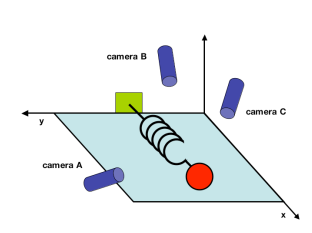

## Rotation Operator in 3D
$$\begin{align*}R &= R_z(\alpha) \, R_y(\beta) \, R_x(\gamma) \\&= \begin{bmatrix}
\cos \alpha & -\sin \alpha & 0 \\
\sin \alpha &  \cos \alpha & 0 \\
 0          &   0          & 1 \\
\end{bmatrix}\begin{bmatrix}
 \cos \beta & 0 & \sin \beta \\
  0         & 1 &  0 \\
-\sin \beta & 0 & \cos \beta \\
\end{bmatrix}\begin{bmatrix}
1 &  0          &   0 \\
0 & \cos \gamma & -\sin \gamma \\
0 & \sin \gamma &  \cos \gamma \\
\end{bmatrix}\\
&= 
\begin{bmatrix}
\cos\alpha\cos\beta & \cos\alpha\sin\beta\sin\gamma - \sin\alpha\cos\gamma & \cos\alpha\sin\beta\cos\gamma + \sin\alpha\sin\gamma \\
\sin\alpha\cos\beta & \sin\alpha\sin\beta\sin\gamma + \cos\alpha\cos\gamma & \sin\alpha\sin\beta\cos\gamma - \cos\alpha\sin\gamma \\
-\sin\beta & \cos\beta\sin\gamma & \cos\beta\cos\gamma \\
\end{bmatrix}\end{align*}$$

In [10]:
def Rx(gamma):
    Rx = np.array([[1,0,0],\
                   [0,np.cos(gamma),-np.sin(gamma)],\
                   [0,np.sin(gamma),np.cos(gamma)]])
    return Rx
def Ry(beta):
    Ry = np.array([[np.cos(beta),0,np.sin(beta)],\
                   [0,1,0],\
                   [-np.sin(beta),0,np.cos(beta)]])
    return Ry
def Rz(alpha):
    Rz =  np.array([[np.cos(alpha),-np.sin(alpha),0],\
                    [np.sin(alpha),np.cos(alpha),0],\
                    [0,0,1]])
    return Rz
def RzRyRx(alpha,beta,gamma):
    return np.linalg.multi_dot((Rz(alpha),Ry(beta),Rx(gamma)))

In [11]:
Rx(np.pi)

array([[ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -1.0000000e+00, -1.2246468e-16],
       [ 0.0000000e+00,  1.2246468e-16, -1.0000000e+00]])

In [12]:
RzRyRx(0,0,np.pi)

array([[ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -1.0000000e+00, -1.2246468e-16],
       [ 0.0000000e+00,  1.2246468e-16, -1.0000000e+00]])

## Transforming the data
If we are to transform (rotate) our data points in 3D, we need our points to be defined in 3D:

In [13]:
data3D = np.zeros((N,3))

In [14]:
for i in np.arange(N):
    data3D[i,0] = x[i]
data3D[:,1] = (np.random.rand(N)*2-1)*0.5
#print(data3D)

This is our most convenient view of the data, as seen along the z-axis, with the x-axis being the horizontal and y-axis being the vertical.

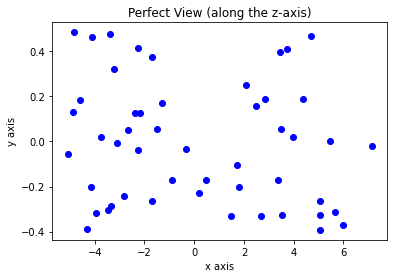

In [15]:
plt.plot(data3D[:,0],data3D[:,1],"ob")
plt.title("Perfect View (along the z-axis)")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

Now, we are going to rotate our camera around the y-axis for 90&deg; degrees such that we are looking along the x-axis (and kudos to those of you who thought "but this transformation operation is about the rotation of the points, not the axes" -- fortunately, for this case, the two interpretations don't differ very much in perception ;)

In [16]:
data3Dp = np.linalg.multi_dot((Ry(np.deg2rad(90)),data3D[:,:].T)).T

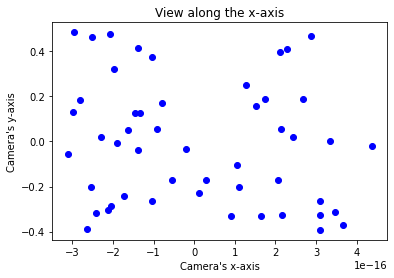

In [17]:
plt.plot(data3Dp[:,0],data3Dp[:,1],"ob")
plt.title("View along the x-axis")
plt.xlabel("Camera's x-axis")
plt.ylabel("Camera's y-axis")
plt.show()

It seems just about the same as looking along the z-axis until you see the order of range at the bottom (x10<sup>-16</sup>)... So, this is what it actully looks like when you equate the range to that of the z-axis view:

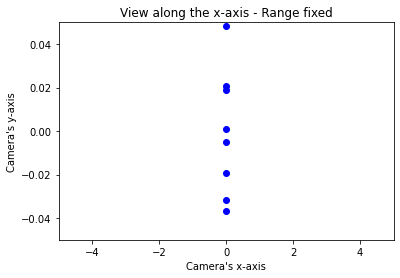

In [18]:
plt.plot(data3Dp[:,0],data3Dp[:,1],"ob")
plt.title("View along the x-axis - Range fixed")
plt.xlabel("Camera's x-axis")
plt.ylabel("Camera's y-axis")
plt.axis(([-5,5,-0.05,0.05]))
plt.show()

...and here are the three in one graph:

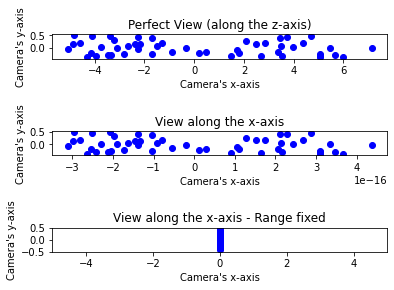

In [19]:
plt.subplot(3,1,1)
plt.plot(data3D[:,0],data3D[:,1],"ob")
plt.title("Perfect View (along the z-axis)")
plt.xlabel("Camera's x-axis")
plt.ylabel("Camera's y-axis")

plt.subplot(3,1,2)
plt.plot(data3Dp[:,0],data3Dp[:,1],"ob")
plt.title("View along the x-axis")
plt.xlabel("Camera's x-axis")
plt.ylabel("Camera's y-axis")

plt.subplot(3,1,3)
plt.plot(data3Dp[:,0],data3Dp[:,1],"ob")
plt.title("View along the x-axis - Range fixed")
plt.xlabel("Camera's x-axis")
plt.ylabel("Camera's y-axis")
plt.axis(([-5,5,-0.5,0.5]))

plt.subplots_adjust(hspace=3)
plt.show()

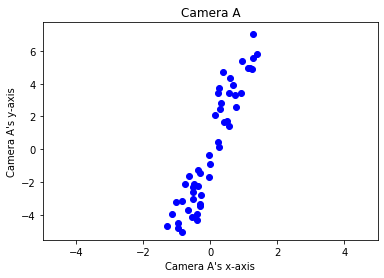

In [20]:
# Camera A data:
data3D_A = np.linalg.multi_dot((Rz(np.deg2rad(80)),Rx(np.deg2rad(20)),data3D[:,:].T)).T
plt.plot(data3D_A[:,0],data3D_A[:,1],"ob")
plt.title("Camera A")
plt.xlabel("Camera A's x-axis")
plt.ylabel("Camera A's y-axis")
plt.axis(([-5,5,np.min(data3D_A[:,1])*1.1,np.max(data3D_A[:,1])*1.1]))
plt.show()

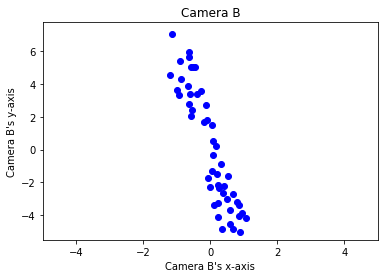

In [21]:
# Camera B data:
data3D_B = np.linalg.multi_dot((Ry(np.deg2rad(20)),Rz(np.deg2rad(100)),data3D[:,:].T)).T
plt.plot(data3D_B[:,0],data3D_B[:,1],"ob")
plt.title("Camera B")
plt.xlabel("Camera B's x-axis")
plt.ylabel("Camera B's y-axis")
plt.axis(([-5,5,np.min(data3D_B[:,1])*1.1,np.max(data3D_B[:,1])*1.1]))
plt.show()

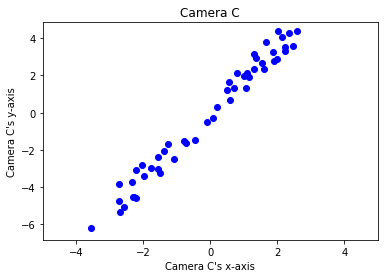

In [22]:
# Camera C data:
data3D_C = np.linalg.multi_dot((Rz(np.deg2rad(60)),Rx(np.deg2rad(160)),Rz(np.deg2rad(180)),data3D[:,:].T)).T
plt.plot(data3D_C[:,0],data3D_C[:,1],"ob")
plt.title("Camera C")
plt.xlabel("Camera C's x-axis")
plt.ylabel("Camera C's y-axis")
plt.axis(([-5,5,np.min(data3D_C[:,1])*1.1,np.max(data3D_C[:,1])*1.1]))
plt.show()

In [23]:
data_all = np.array([data3D_A[:,0],data3D_A[:,1],
                     data3D_B[:,0],data3D_B[:,1],
                     data3D_C[:,0],data3D_C[:,1]])
#data_all = np.array([data3D_C[:,0],data3D_C[:,1],
#                     data3D_B[:,0],data3D_B[:,1],
#                     data3D_A[:,0],data3D_A[:,1]])
print(data_all[:,0:3])
print(data3D_A[0,:])
print(data3D_B[1,:])
print(data3D_C[2,:])

[[ 0.38060203  0.24681657 -0.50616615]
 [ 4.68600015  0.1566613  -2.60935965]
 [-1.19603789  0.1804149   0.38898173]
 [ 4.52868211  0.23403536 -2.6256206 ]
 [-2.72054476  0.08837253  1.28951828]
 [-3.83433064 -0.27866015  2.32424279]]
[0.38060203 4.68600015 0.15974492]
[ 0.1804149   0.23403536 -0.06566565]
[ 1.28951828  2.32424279 -0.0165118 ]


In [24]:
S = np.dot(data_all,data_all.T)
print((S/(N-1)))
#Sigma = np.cov(data_all)
#print(Sigma)

[[  0.52500164   2.4405002   -0.31523606   2.47392024  -1.1665487
   -2.20699617]
 [  2.4405002   12.94599221  -1.99651785  13.00168514  -6.45199177
  -11.48592869]
 [ -0.31523606  -1.99651785   0.36546064  -1.98352624   1.0418521
    1.73205123]
 [  2.47392024  13.00168514  -1.98352624  13.06570871  -6.46218926
  -11.55007393]
 [ -1.1665487   -6.45199177   1.0418521   -6.46218926   3.25363222
    5.69235549]
 [ -2.20699617 -11.48592869   1.73205123 -11.55007393   5.69235549
   10.21736164]]


In [25]:
[u,s,vh]=np.linalg.svd(S)
print(u,"\n\n",s,"\n\n",vh)

[[-0.10752973  0.56618061 -0.19499306 -0.05978417 -0.77083374  0.17915294]
 [-0.5675409  -0.11146105 -0.72352328  0.15553322  0.09137513 -0.330829  ]
 [ 0.08701684  0.57003774 -0.30679288 -0.0724583   0.59678529  0.46039144]
 [-0.57017317  0.0953356   0.31596895 -0.74121723  0.11262556 -0.06236827]
 [ 0.28243571  0.50536529  0.07600439 -0.03287623  0.12899105 -0.80083693]
 [ 0.50388033 -0.27854976 -0.48862752 -0.64536906 -0.109499   -0.0355884 ]] 

 [1.96905847e+03 9.22622287e+00 2.13203411e-13 1.69416162e-13
 6.55354615e-14 5.70644012e-15] 

 [[-0.10752973 -0.5675409   0.08701684 -0.57017317  0.28243571  0.50388033]
 [ 0.56618061 -0.11146105  0.57003774  0.0953356   0.50536529 -0.27854976]
 [ 0.13495919  0.54010744  0.13765705 -0.78318704 -0.14515187 -0.19149282]
 [-0.24381292 -0.49891047 -0.15051221 -0.20815926 -0.06246048 -0.78851638]
 [ 0.06561137 -0.26966683  0.58569331  0.04724611 -0.7552015   0.08588819]
 [ 0.76544974 -0.22831088 -0.53183174 -0.08288101 -0.26369737  0.05206035]]

In [26]:
u1=u[:,0]
print(u1)
np.dot(u1,data_all)


[-0.10752973 -0.5675409   0.08701684 -0.57017317  0.28243571  0.50388033]


array([ -8.087054  ,  -0.34864517,   4.60159883,   4.87265152,
        -5.86303971,  -6.84257237,   2.61393192,   5.85148689,
         7.93266562,  -2.97043212,  -7.56104413,   2.93649773,
         8.36605708,   7.19615299,  -3.09348758,  -9.84148829,
         3.79173008,   8.46562179,   5.62691772,  -8.78296346,
        -3.62684881,   6.48792742,   8.80652745,   2.97876443,
        -8.7902679 ,  -9.47480938,   0.59136888,   7.11226763,
         1.56546489,  -8.79167104,  -4.92716995,   6.00223686,
         5.35214008,  -0.85402507, -12.37599741,  -2.5777339 ,
         5.75100728,   4.12552831,  -6.47222215,  -5.9485951 ,
        -4.66826121,   3.90568326,   2.24608573,  -6.1366587 ,
        -6.00453932,   3.89533039,   6.86026648,   7.47556212,
        -4.29701557, -10.34978632])

In [27]:
m = np.mean(data_all,1)
print(m)
data_all_norm = data_all.copy()
for i in np.arange(6):
    data_all_norm[i,:] -= m[i]
print(data_all[:,0:3])
print(data_all_norm[:,0:3])

[ 0.03288218  0.14982738 -0.01873985  0.15210899 -0.07111797 -0.13591069]
[[ 0.38060203  0.24681657 -0.50616615]
 [ 4.68600015  0.1566613  -2.60935965]
 [-1.19603789  0.1804149   0.38898173]
 [ 4.52868211  0.23403536 -2.6256206 ]
 [-2.72054476  0.08837253  1.28951828]
 [-3.83433064 -0.27866015  2.32424279]]
[[ 0.34771984  0.21393439 -0.53904834]
 [ 4.53617277  0.00683392 -2.75918703]
 [-1.17729805  0.19915475  0.40772158]
 [ 4.37657312  0.08192637 -2.77772959]
 [-2.6494268   0.1594905   1.36063625]
 [-3.69841995 -0.14274946  2.46015348]]


In [28]:
S = np.dot(data_all_norm,data_all_norm.T)/(N-1)
with np.printoptions(formatter={'float': '{:9.5f}'.format}):
    print(S)

#Sigma = np.cov(data_all_norm)
#print(Sigma)

[[  0.52390   2.43547  -0.31461   2.46882  -1.16416  -2.20244]
 [  2.43547  12.92309  -1.99365  12.97843  -6.44112 -11.46515]
 [ -0.31461  -1.99365   0.36510  -1.98062   1.04049   1.72945]
 [  2.46882  12.97843  -1.98062  13.04210  -6.45115 -11.52898]
 [ -1.16416  -6.44112   1.04049  -6.45115   3.24847   5.68249]
 [ -2.20244 -11.46515   1.72945 -11.52898   5.68249  10.19851]]


In [29]:
[u,s,vh]=np.linalg.svd(S)
u*=-1
with np.printoptions(formatter={'float': '{:9.5f}'.format}):
    print(u,"\n\n",s,"\n\n",vh)

[[  0.10750  -0.56619  -0.07014   0.02081   0.15827  -0.79842]
 [  0.56755   0.11143  -0.76471   0.10990   0.23577   0.11417]
 [ -0.08705  -0.57003   0.07203   0.65578   0.19308   0.44155]
 [  0.57017  -0.09537   0.20119   0.20806  -0.76268  -0.01904]
 [ -0.28246  -0.50535  -0.43826  -0.48895  -0.40361   0.26608]
 [ -0.50387   0.27858  -0.41542   0.52448  -0.37081  -0.28873]] 

 [ 40.11294   0.18823   0.00000   0.00000   0.00000   0.00000] 

 [[ -0.10750  -0.56755   0.08705  -0.57017   0.28246   0.50387]
 [  0.56619  -0.11143   0.57003   0.09537   0.50535  -0.27858]
 [  0.07166  -0.75896   0.01175   0.16250  -0.49971  -0.37760]
 [  0.10184  -0.14775   0.10010   0.71716  -0.02817   0.66533]
 [ -0.59472  -0.23063  -0.18078   0.35320   0.59365  -0.28856]
 [  0.54652  -0.12012  -0.79034   0.01844   0.24880  -0.00077]]


In [30]:
u1=u[:,0]
print(u1)


[ 0.10750032  0.56754669 -0.08704645  0.57016822 -0.28246195 -0.50386586]


In [31]:
for i in [0,2,4]:
    print(u1[i+1]/u1[i])

5.27948829689203
-6.550160653495635
1.783836200821339


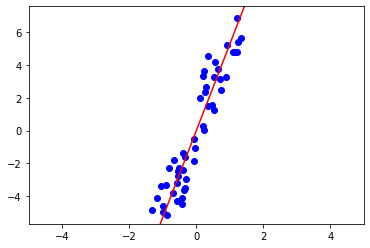

In [32]:
plt.plot(data_all_norm[0,:],data_all_norm[1,:],"bo")
xx = np.linspace(-5,5,N)
yy = u1[1]/u1[0]*xx
plt.axis([-5,5,np.min(data_all_norm[1,:])*1.1,np.max(data_all_norm[1,:])*1.1])
plt.plot(xx,yy,"r-")
plt.show()

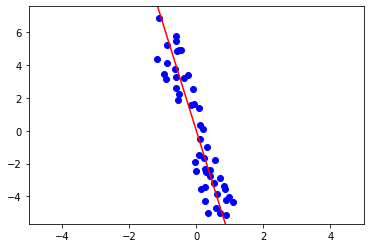

In [33]:
plt.plot(data_all_norm[2,:],data_all_norm[3,:],"bo")
xx = np.linspace(-5,5,N)
yy = u1[3]/u1[2]*xx
plt.axis([-5,5,np.min(data_all_norm[3,:])*1.1,np.max(data_all_norm[3,:])*1.1])
plt.plot(xx,yy,"r-")
plt.show()

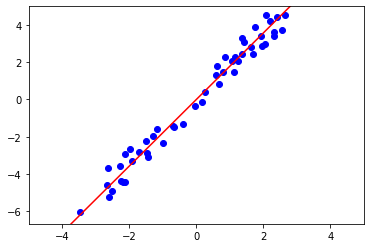

In [34]:
plt.plot(data_all_norm[4,:],data_all_norm[5,:],"bo")
xx = np.linspace(-5,5,N)
yy = u1[5]/u1[4]*xx
plt.axis([-5,5,np.min(data_all_norm[5,:])*1.1,np.max(data_all_norm[5,:])*1.1])
plt.plot(xx,yy,"r-")
plt.show()

In [35]:
print(u1)
print(data_all_norm.shape)

[ 0.10750032  0.56754669 -0.08704645  0.57016822 -0.28246195 -0.50386586]
(6, 50)


In [36]:
res=np.dot(u.T,data_all_norm)

In [37]:
res.shape

(6, 50)

In [38]:
with np.printoptions(formatter={'float': '{:7.3f}'.format}):
    print(res[:,0:8])

[[  7.822   0.083  -4.867  -5.138   5.598   6.577  -2.879  -6.117]
 [  0.871  -0.362   0.028  -0.447  -0.199   0.125   0.063   0.711]
 [ -0.000   0.000  -0.000   0.000   0.000  -0.000  -0.000  -0.000]
 [  0.000  -0.000   0.000  -0.000  -0.000   0.000  -0.000   0.000]
 [  0.000  -0.000  -0.000   0.000   0.000   0.000  -0.000  -0.000]
 [ -0.000   0.000  -0.000   0.000   0.000   0.000  -0.000  -0.000]]


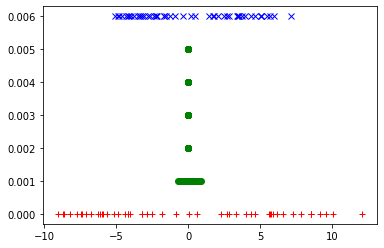

In [39]:
plt.plot(res[0,:],np.zeros(N),"r+")
for i in range(1,6):
    plt.plot(res[i,:],np.ones(N)*0.001*i,"go")
plt.plot(x,np.ones(N)*0.006,"bx")
plt.show()

In [40]:
np.var(res[0,:])

39.31068085791099

In [41]:
np.diagonal(np.cov(data_all_norm))

array([ 0.52389834, 12.92308584,  0.36510229, 13.04209938,  3.24847123,
       10.19851295])

In [42]:
np.var(x)

13.114541708627875

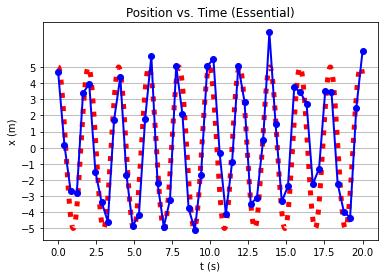

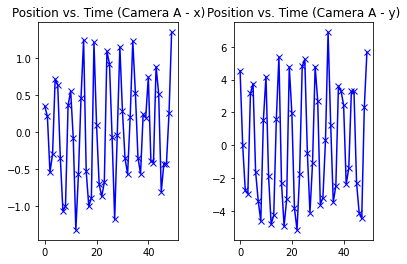

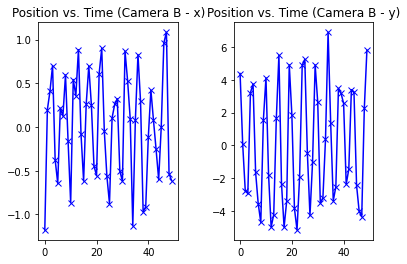

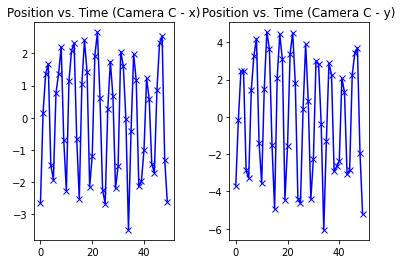

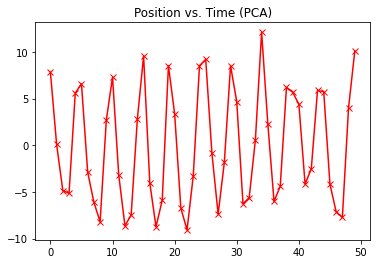

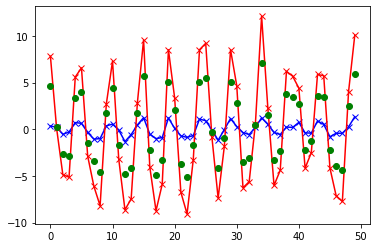

In [43]:
tt = np.linspace(0,20,1000)
xx = A*np.cos(w*tt)
plt.plot(tt,xx,"r:",linewidth=5)

plt.plot(t,x,"ob-",linewidth=2)
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.yticks(np.arange(-5,6))
plt.title("Position vs. Time (Essential)")
plt.grid(axis='y')
plt.show()

plt.subplot(1,2,1)
plt.title("Position vs. Time (Camera A - x)")
plt.plot(data_all_norm[0,:],"bx-")
plt.subplot(1,2,2)
plt.title("Position vs. Time (Camera A - y)")
plt.plot(data_all_norm[1,:],"bx-")
plt.subplots_adjust(wspace=.4)
plt.show()

plt.subplot(1,2,1)
plt.title("Position vs. Time (Camera B - x)")
plt.plot(data_all_norm[2,:],"bx-")
plt.subplot(1,2,2)
plt.title("Position vs. Time (Camera B - y)")
plt.plot(data_all_norm[3,:],"bx-")
plt.subplots_adjust(wspace=.4)
plt.show()

plt.subplot(1,2,1)
plt.title("Position vs. Time (Camera C - x)")
plt.plot(data_all_norm[4,:],"bx-")
plt.subplot(1,2,2)
plt.title("Position vs. Time (Camera C - y)")
plt.plot(data_all_norm[5,:],"bx-")
plt.subplots_adjust(wspace=.4)
plt.show()

plt.title("Position vs. Time (PCA)")
plt.plot(res[0,:],"rx-")
plt.show()


plt.plot(data_all_norm[0,:],"bx-",res[0,:],"rx-",x,"go")
plt.show()

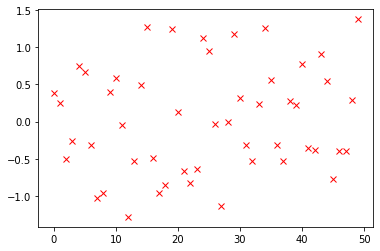

In [44]:
plt.plot(data3D_A[:,0],"rx")
plt.show()

# References
* Jonathon Shlens, "A Tutorial on Principal Component Analysis" (2014) [arXiv:1404.1100](https://arxiv.org/abs/1404.1100)